# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# План проекта

1. Загрузить и подготовить данные.
2. Обучить и проверить модель для каждого региона:
* Разбить данные на обучающую и валидационную выборки в соотношении 75:25.
* Обучить модель и сделать предсказания на валидационной выборке.
* Сохранить предсказания и правильные ответы на валидационной выборке.
* Напечатать на экране средний запас предсказанного сырья и RMSE модели.
* Проанализировать результаты.
3. Подготовиться к расчёту прибыли:
* Все ключевые значения для расчётов сохранить в отдельных переменных.
* Рассчитать достаточный объём сырья для безубыточной разработки новой скважины. Сравнить полученный объём сырья со средним запасом в каждом регионе. 
* Написать выводы по этапу подготовки расчёта прибыли.
4. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:
* Выбрать скважины с максимальными значениями предсказаний. 
* Просуммировать целевое значение объёма сырья, соответствующее этим предсказаниям.
* Рассчитать прибыль для полученного объёма сырья.
5. Посчитать риски и прибыль для каждого региона:
* Применить технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
* Найти среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
* Написать выводы: предложить регион для разработки скважин и обосновать выбор.

# Цель проекта

Построить модель машинного обучения, которая поможет определить регион, где добыча принесет наибольшую прибыль.

## Загрузка и подготовка данных

In [1]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Сохранение датасетов в переменные
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Список переменных
df_list = [df_0, df_1, df_2]

In [3]:
# Ознакомление с содержимым датасета
for df in df_list:
    display(df.head())
    display(df.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Структура всех датасетов одинакова, типы данных соответсвуют значениям.

In [4]:
# Проверка на явные дубликаты и пропущенные значения
for df in df_list:
    display(df.duplicated().sum())
    display(df.isnull().sum())

0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

0

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Пропущенные значения и явные дубликаты в датасетах не обнаружены.

In [5]:
# Проверка на неявные дубликаты, проверка повторяющихся id
for df in df_list:
    print(len(df['id'].unique()))

99990
99996
99996


Есть повторяющиеся id, 18 дубликатов. Так при проверке на явные дубликаты они не проявились, значит дублируютя только значения столбца id. Это странно, так как данные по условию задачи синтезированы. Удалим строки с дубликатами значений id (тем более, что их количество не велико).

In [6]:
# Удаление строк с дублирующимся id
for i in range(3):
    df_list[i] = df_list[i].drop_duplicates(subset=['id']).reset_index(drop=True)

In [7]:
# Изучение корреляции параметров
for df in df_list:
    display(df.corr().style.background_gradient(cmap='RdYlBu'))

,f0,f1,f2,product
f0,1.000000,-0.440717,-0.003211,0.143504
f1,-0.440717,1.000000,0.001764,-0.192351
f2,-0.003211,0.001764,1.000000,0.483631
product,0.143504,-0.192351,0.483631,1.000000


,f0,f1,f2,product
f0,1.000000,0.182279,-0.001810,-0.030523
f1,0.182279,1.000000,-0.002594,-0.010154
f2,-0.001810,-0.002594,1.000000,0.999397
product,-0.030523,-0.010154,0.999397,1.000000


,f0,f1,f2,product
f0,1.000000,0.000506,-0.000452,-0.001978
f1,0.000506,1.000000,0.000753,-0.001055
f2,-0.000452,0.000753,1.000000,0.445867
product,-0.001978,-0.001055,0.445867,1.000000


Исходя из полученных данных, можно зафиксировать несколько наблюдений:
* Для региона 1, есть корреляция между признаками f2 и product и обратная корреляция f0 и f1.
* Для региона 2, есть корреляция между product и f2.
* Для региона 3, так же есть корреляция poduct и f2.

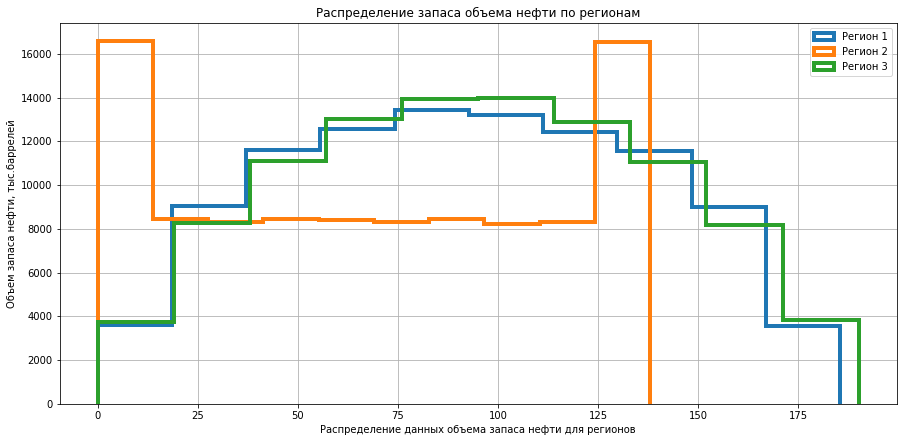

In [8]:
# График распределения запасов объема нефти по регионам
plt.title('Распределение запаса объема нефти по регионам')
ax=df_0['product'].plot(kind='hist',figsize=(15,7),grid=True, legend=True, histtype='step', linewidth=4, label='Регион 1')
ax1=df_1['product'].plot(kind='hist',figsize=(15,7),grid=True, legend=True,histtype='step', linewidth=4, label='Регион 2', ax=ax)
df_2['product'].plot(kind='hist',figsize=(15,7),grid=True, legend=True,histtype='step', linewidth=4, label='Регион 3', ax=ax1)
plt.xlabel('Распределение данных объема запаса нефти для регионов')
plt.ylabel('Объем запаса нефти, тыс.баррелей')
plt.show()

Библиотеки подключены, данные загружены. Проведена проверка на дубликаты, пропуски и соответствие типов данных. В ходе предобработки из датасетов исключены строки с дублирующимся значением id (так как данные синтезированы, возможно это результат какого-либо сбоя). Изучены корреляции признаков, между признаками нет сильной корреляции, за исключением признака f2 с целевым признаком product, что в совокупности должно обеспечить более высокую точность модели. Так же изучено распределние данных объема запаса нефти для каждого из регионов, как видно на графике, значения для регионов 1 и 3 схожи между собой, а значения для региона 2 сильно отличаются, как это повлияет на исследование, узнаем. Кроме того, график показал, что у целевого признака отсутствуют выбросы. Данные подготовлены для дальйнейшего исследования.

## Обучение и проверка модели

In [9]:
# Функция для обучения по данным для каждого региона
def predict(df_region):
    # Обозначим целевой признак
    features = df_region.drop(['product', 'id'], axis=1)
    target = df_region['product']
    
    # Поделим выборку на обучающую и валидационную в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    
    # Инициализация модели Линейной регрессии
    model = LinearRegression(normalize=False)
    # Обучение модели
    model.fit(features_train, target_train)
    # Предсказание
    predictions = model.predict(features_valid)
    # Преобразование в Series
    predictions = pd.Series(predictions)
    
    # Расчет среднеквадратичной ошибки
    rmse = (mean_squared_error(predictions, target_valid))**(0.5)
    # Расчет среднего значения
    mean = sum(predictions) / len(predictions)
    
    # Вывод Среднеквадратичной ошибки и Среднего значения объема запасов нефти с округлением до двух знаков
    print('Среднеквадратичная ошибка (RMSE): {0:.2f}'.format(rmse))
    print('Запас объема нефти в среднем по региону: {0:.2f}'.format(mean), 'тысяч бар.\n')
    
    # Возвращем предсказани, валидационную выборку, значение RMSE, для сохранения в переменных
    return (predictions, target_valid.reset_index(drop=True), rmse)

In [10]:
# Переменная-счетчик для нумерации регионов из списка
n = 1
# Цикл который поочередно передаст каждый регион из списка в функцию
for df_region in [df_0, df_1, df_2]:
    # Обозначение датаесета из списка
    print(f'Регион {n}')
    # Обращение к функции
    predict(df_region)
    # Увеличиваем счетчик
    n+=1

Регион 1
Среднеквадратичная ошибка (RMSE): 37.58
Запас объема нефти в среднем по региону: 92.59 тысяч бар.

Регион 2
Среднеквадратичная ошибка (RMSE): 0.89
Запас объема нефти в среднем по региону: 68.73 тысяч бар.

Регион 3
Среднеквадратичная ошибка (RMSE): 40.03
Запас объема нефти в среднем по региону: 94.97 тысяч бар.



In [11]:
# Сохранение переменных полученных при помощи функции
pred_0, target_0, rmse_0 = predict(df_0)
pred_1, target_1, rmse_1 = predict(df_1)
pred_2, target_2, rmse_2 = predict(df_2)

Среднеквадратичная ошибка (RMSE): 37.58
Запас объема нефти в среднем по региону: 92.59 тысяч бар.

Среднеквадратичная ошибка (RMSE): 0.89
Запас объема нефти в среднем по региону: 68.73 тысяч бар.

Среднеквадратичная ошибка (RMSE): 40.03
Запас объема нефти в среднем по региону: 94.97 тысяч бар.



* Самое низкое значение среднеквадратичной ошибки у региона номер 2.
* Самое высокое значение среднего объема запасов ресурсов у региона номер 3.

## Подготовка к расчёту прибыли

Для подготовки к расчету прибыли, обратимся к условиям поставленной задачи.

* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [12]:
# Объявим константы с исходными цифрам из условия задачи
BUDGET = 10000000000 # Бюджет
PRICE = 450000 #  Доход с каждой единицы продукта
BEST_UNIT = 200 # Лучшие скважины для разработки
MIN = BUDGET / BEST_UNIT / PRICE # Минимальное среднее количество продука
MLRD = 1000000000 # Миллиард для привдения в красивый формат
print('Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки: {:.2f} тысяч бар.'.format(MIN))


Минимальное среднее количество продукта в месторождениях региона, достаточное для разработки: 111.11 тысяч бар.


Похоже, что ни один из регионов не обладает достаточным объемом запаса продукта, достаточного для разработки.

## Расчёт прибыли и рисков 

In [13]:
# Функция для расчета прибыли
def revenue(target, probs):
    
    # Сортировка шахт по убыванию
    best_probs = probs.sort_values(ascending=False)
    # Срез первых двухста, лучших
    selected = target[best_probs.index][:BEST_UNIT]
    # Возвращем значение прибыли для среза
    return ((PRICE * selected.sum()) - BUDGET) / MLRD

In [14]:
print('Предполагаемая прибыль двухста лучших шахт Региона 1: {:.2f} млрд. руб.'.format(revenue(target_0, pred_0)))
print('Предполагаемая прибыль двухста лучших шахт Региона 2: {:.2f} млрд. руб.'.format(revenue(target_1, pred_1)))
print('Предполагаемая прибыль двухста лучших шахт Региона 3: {:.2f} млрд. руб.'.format(revenue(target_2, pred_2)))

Предполагаемая прибыль двухста лучших шахт Региона 1: 3.32 млрд. руб.
Предполагаемая прибыль двухста лучших шахт Региона 2: 2.42 млрд. руб.
Предполагаемая прибыль двухста лучших шахт Региона 3: 2.71 млрд. руб.


При подготовке к расчету прибыли, все значения из условий к поставленной задаче сохранены в константы. В результате подготовки можно сделать следующие выводы:
* Ни один из регионов не обладает минимальным средним количеством продукта, достаточного для разработки. Самое большой объем запасов в регионе номер 3.
* При выборе 200 наиболее перспективных скважни наибольшую предполагаемую прибиль показал регион номер 1.

In [15]:
state = np.random.RandomState(12345)

# Значения исходя из условия задачи
samples = 1000
risk = 0.025
units = 500

# Функция для применения техники bootstrap
def bootstrap (target, predictions):
    values = []
    #Цикл формирующий выборки
    for i in range(samples):
        target_subsample = target.reset_index(drop=True).sample(n=units, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        rev = revenue(target_subsample, probs_subsample)
        values.append(rev)
    values = pd.Series(values)
    # Минимальный квантиль исходя из условий
    lower = values.quantile(risk)
    # Расчет доверительного интервала
    interval = (values.quantile(0.025), values.quantile(0.975))
    # Расчет средних значений
    mean = values.mean()

    print("Средняя выручка:", mean)
    print("Доверительный интервал:", interval)
    # Расчет рисков в процентах
    print("Риск убытка:", ((values < 0).mean()*100).round(2),'%')

In [16]:
# Обращение к функции для Региона 1
print('Регион 1')
bootstrap(target_0, pred_0)

Регион 1
Средняя выручка: 0.42593852691059236
Доверительный интервал: (-0.10209009483793655, 0.9479763533583688)
Риск убытка: 6.0 %


In [17]:
# Обращение к функции для Региона 2
print('Регион 2')
bootstrap(target_1, pred_1)

Регион 2
Средняя выручка: 0.5182594936973248
Доверительный интервал: (0.12812323143308443, 0.9536129820669085)
Риск убытка: 0.3 %


In [18]:
# Обращение к функции для Региона 3
print('Регион 3')
bootstrap(target_2, pred_2)

Регион 3
Средняя выручка: 0.4201940053440501
Доверительный интервал: (-0.11585260916001143, 0.9896299398445739)
Риск убытка: 6.2 %


# Вывод

* В ходе проведения исследования, данные были загружены, предопработаны и изучены. 
* После чего данные были разделены на обучающую и валидационную выборку в соотношение 75:25, обучены и проверены. В следствии чего были получены значения запасов объемов нефти для каждого региона и получены значения возможной среднеквадратичной ошибки. В результате, самым потенциально перспективным регионом по объему запасов оказался регион номер 3, по региону 2 самое минимальное значение среднеквадратичной ошибки. 
* Далее была произведена подготовка к расчету прибыли и рисков в ходе которой выяснилось что, минимальное среднее количество продукта в месторождениях региона, достаточное для разработки: 111.11 тысяч бар. И ни один из регионов не обладает таким объемом запасов. 
* Итоговым этапом исследования, стал расчет прибыли и рисков, в ходе которого произведен расчет самого потенциально прибыльного региона, по 200 лучшим скважинам, им оказался регион номер 1. 
* Далее при помощи технологии bootstrap произведен расчет средней выручки, доверительного интервала и риска убытков. Так как в задаче есть четкое условие, что вероятность убытков не должна превышать 2,5%, под этот критерий попадает только регион номер 2, который кроме того имеет и самую высокую среднюю выручку.

По итогу проведенного исследования, самым подходящим под условия поставленной задачи является регион номер 2.
